# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [29]:
sinasc_raw = pd.read_csv('sinasc_ro_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [30]:
sinasc_raw['munResLat'].describe()

count    27027.000000
mean       -10.377988
std          1.372942
min        -13.499760
25%        -11.433870
50%        -10.435950
75%         -8.768890
max         -8.768890
Name: munResLat, dtype: float64

In [31]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [32]:
mun_lat = pd.cut(sinasc_raw['munResLat'], [-13.4, -10.5, -8.7])
sinasc_raw.pivot_table(index = mun_lat, values = ['QTDPARTNOR', 'QTDPARTCES'],
                       aggfunc = ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

sum                  mean                   min  \
               QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR QTDPARTCES   
munResLat                                                               
(-13.4, -10.5]     7036.0     5752.0   0.553145   0.452735        0.0   
(-10.5, -8.7]      6041.0     8771.0   0.487335   0.711759        0.0   

                                 max                median             \
               QTDPARTNOR QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR   
munResLat                                                               
(-13.4, -10.5]        0.0       12.0       41.0        0.0        0.0   
(-10.5, -8.7]         0.0       12.0       40.0        0.0        0.0   

                      std                   var             
               QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR  
munResLat                                                   
(-13.4, -10.5]   0.753328   1.124838   0.567503   1.265260  
(-10.5, -8.7]    0.737899   1.279042   0.544495   1.635949

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [33]:
sinasc_raw['munResArea'].describe()

count    27027.000000
mean     14702.799767
std      13706.177751
min        459.978000
25%       3792.998000
50%       6896.648000
75%      34096.394000
max      34096.394000
Name: munResArea, dtype: float64

In [34]:
mun_res_area = pd.cut(sinasc_raw['munResArea'], [459, 3000, 34097])
sinasc_raw.groupby(mun_res_area)['CONSULTAS', 'APGAR1'].agg([('soma','sum'), ('media','mean'), ('minimo','min'), ('maximo','max'),
                                  ('mediana','median'), ('desvio padrao','std'), ('variancia','var')])

/var/folders/fh/jnd5437n687gr20346k2zzm40000gn/T/ipykernel_579/164987448.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc_raw.groupby(mun_res_area)['CONSULTAS', 'APGAR1'].agg([('soma','sum'), ('media','mean'), ('minimo','min'), ('maximo','max'),


CONSULTAS                                                \
                   soma     media minimo maximo mediana desvio padrao   
munResArea                                                              
(459, 3000]       19520  3.740180      1      9     4.0      0.607492   
(3000, 34097]     77142  3.537326      1      9     4.0      0.820967   

                           APGAR1                                  \
              variancia      soma     media minimo maximo mediana   
munResArea                                                          
(459, 3000]    0.369046   42070.0  8.073306    0.0   10.0     8.0   
(3000, 34097]  0.673986  177079.0  8.152808    0.0   10.0     8.0   

                                       
              desvio padrao variancia  
munResArea                             
(459, 3000]        1.008790  1.017658  
(3000, 34097]      0.978517  0.957495

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [35]:
mun_res_alt = pd.cut(sinasc_raw['munResAlt'], 4)
sinasc_raw.groupby(mun_res_alt)['QTDGESTANT', 'SERIESCMAE'].agg([('soma','sum'), ('media','mean'), ('minimo','min'), ('maximo','max'),
                                  ('mediana','median'), ('desvio padrao','std'), ('variancia','var')])

/var/folders/fh/jnd5437n687gr20346k2zzm40000gn/T/ipykernel_579/1420541349.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc_raw.groupby(mun_res_alt)['QTDGESTANT', 'SERIESCMAE'].agg([('soma','sum'), ('media','mean'), ('minimo','min'), ('maximo','max'),


QTDGESTANT                                                \
                     soma     media minimo maximo mediana desvio padrao   
munResAlt                                                                 
(84.49, 212.5]    26397.0  1.313414    0.0   52.0     1.0      1.448367   
(212.5, 340.0]     4290.0  1.139140    0.0   12.0     1.0      1.237215   
(340.0, 467.5]      416.0  1.136612    0.0    9.0     1.0      1.217644   
(467.5, 595.0]     1813.0  1.143849    0.0    9.0     1.0      1.213664   

                         SERIESCMAE                                  \
               variancia       soma     media minimo maximo mediana   
munResAlt                                                             
(84.49, 212.5]  2.097766    45631.0  4.268968    1.0    8.0     3.0   
(212.5, 340.0]  1.530701     9325.0  3.969774    1.0    8.0     3.0   
(340.0, 467.5]  1.482656      906.0  4.118182    1.0    8.0     3.0   
(467.5, 595.0]  1.472981     4126.0  3.896128    1.0    8.0     3.0   

                                        
               desvio padrao variancia  
munResAlt                               
(84.49, 212.5]      2.416721  5.840542  
(212.5, 340.0]      2.178653  4.746531  
(340.0, 467.5]      2.114235  4.469988  
(467.5, 595.0]      2.304466  5.310562

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

<AxesSubplot:xlabel='munResNome'>

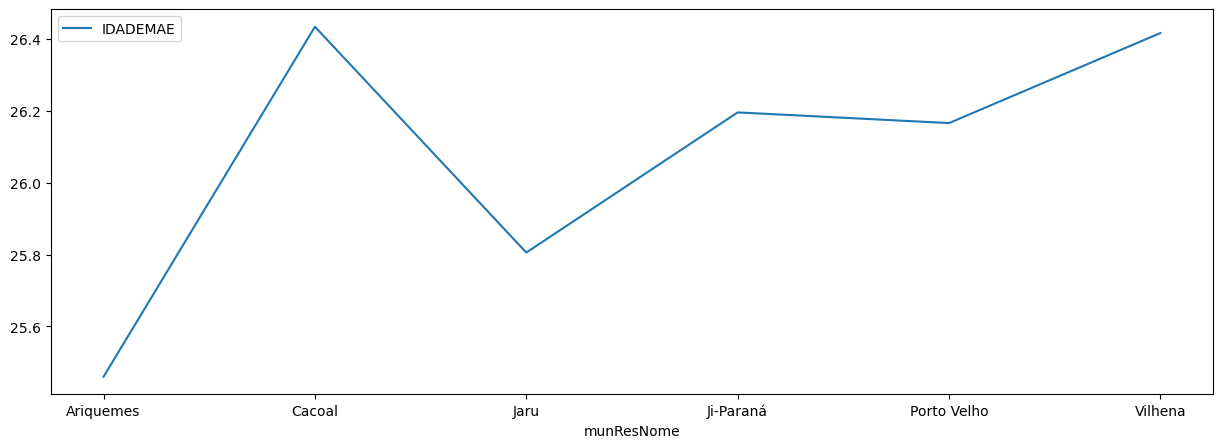

In [128]:
sinasc_imed = sinasc_raw.set_index('munResNome')
imediatas = {'Candeias do Jamari':'Porto Velho',
             'Guajará-Mirim':'Porto Velho',
             'Itapuã do Oeste':'Porto Velho',
             'Nova Mamoré':'Porto Velho',
             'Porto Velho':'Porto Velho',
             'Alto Paraíso':'Ariquemes',
             'Ariquemes':'Ariquemes',
             'Buritis':'Ariquemes',
             'Cacaulândia':'Ariquemes',
             'Campo Novo de Rondônia':'Ariquemes',
             'Cujubim':'Ariquemes',
             'Monte Negro':'Ariquemes',
             'Rio Crespo':'Ariquemes',
             'Governador Jorge Teixeira':'Jaru',
             'Jaru':'Jaru',
             "Machadinho d'Oeste":'Jaru',
             'Theobroma':'Jaru',
             'Vale do Anari':'Jaru',
             "Alvorada d'Oeste":'Ji-Paraná',
             'Ji-Paraná':'Ji-Paraná',
             'Mirante da Serra':'Ji-Paraná',
             'Nova União':'Ji-Paraná',
             'Ouro Preto do Oeste':'Ji-Paraná',
             'Presidente Médici':'Ji-Paraná',
             'São Francisco do Guaporé':'Ji-Paraná',
             'São Miguel do Guaporé':'Ji-Paraná',
             'Seringueiras':'Ji-Paraná',
             'Teixeirópolis':'Ji-Paraná',
             'Urupá':'Ji-Paraná',
             'Vale do Paraíso':'Ji-Paraná',
             "Alta Floresta d'Oeste":'Cacoal',
             'Alto Alegre dos Parecis':'Cacoal',
             'Cacoal':'Cacoal',
             'Castanheiras':'Cacoal',
             "Espigão d'Oeste":'Cacoal',
             'Ministro Andreazza':'Cacoal',
             "Nova Brasilândia d'Oeste":'Cacoal',
             'Novo Horizonte do Oeste':'Cacoal',
             'Parecis':'Cacoal',
             'Pimenta Bueno':'Cacoal',
             'Primavera de Rondônia':'Cacoal',
             'Rolim de Moura':'Cacoal',
             "Santa Luzia d'Oeste":'Cacoal',
             "São Felipe d'Oeste":'Cacoal',
             'Cabixi':'Vilhena',
             'Cerejeiras':'Vilhena',
             'Chupinguaia':'Vilhena',
             'Colorado do Oeste':'Vilhena',
             'Corumbiara':'Vilhena',
             'Pimenteiras do Oeste':'Vilhena',
             'Vilhena':'Vilhena'}
            
    
    
sinasc_imed.pivot_table(values='IDADEMAE', index=[imediatas]).plot(figsize=[15,5])

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


<AxesSubplot:xlabel='munResNome'>

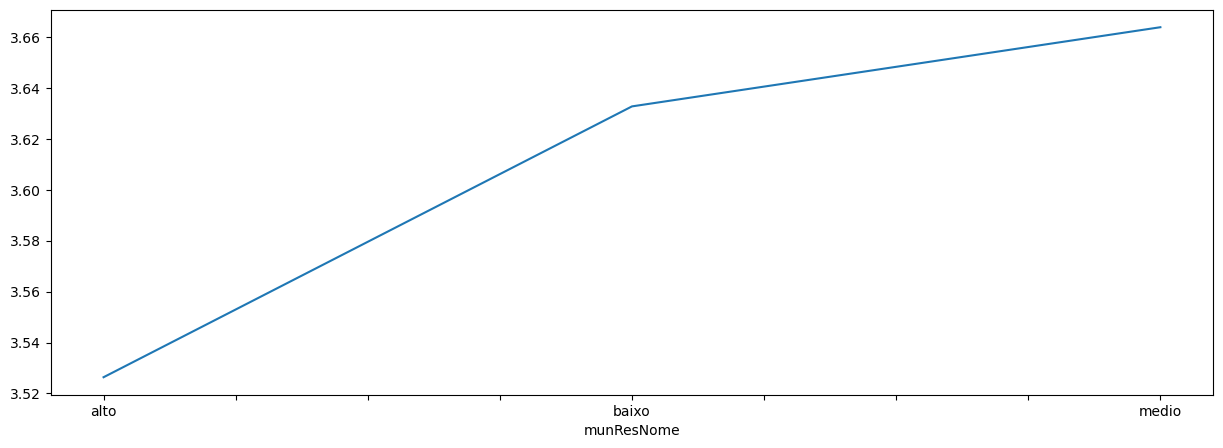

In [136]:
idh = {
        'Porto Velho':'alto',
        'Vilhena':'alto',
        'Cacoal':'alto',
        'Ji-Paraná':'alto',
        'Pimenta Bueno':'alto',
        'Ariquemes':'alto',
        'Rolim de Moura':'alto',
        'Cerejeiras':'medio',
        'Jaru':'medio',
        'Colorado do Oeste':'medio',
        'Ouro Preto do Oeste':'medio',
        "Espigão d'Oeste":'medio',
        "Santa Luzia d'Oeste":'medio',
        'Pimenteiras do Oeste':'medio',
        'Presidente Médici':'medio',
        'Castanheiras':'medio',
        'Guajará-Mirim':'medio',
        'Chupinguaia':'medio',
        'Cabixi':'medio',
        'Candeias do Jamari':'medio',
        "São Felipe d'Oeste":'medio',
        'Cacaulândia':'medio',
        'São Miguel do Guaporé':'medio',
        'Mirante da Serra':'medio',
        "Alvorada d'Oeste":'medio',
        'Teixeirópolis':'medio',
        "Nova Brasilândia d'Oeste":'medio',
        'Rio Crespo':'medio',
        'Primavera de Rondônia':'medio',
        "Alta Floresta d'Oeste":'medio',
        'Ministro Andreazza':'medio',
        'Novo Horizonte do Oeste':'medio',
        'Vale do Paraíso':'medio',
        'Alto Paraíso':'medio',
        'Parecis':'medio',
        'Buritis':'medio',
        'Itapuã do Oeste':'medio',
        'Corumbiara':'medio',
        'Cujubim':'medio',
        'Costa Marques':'medio',
        'São Francisco do Guaporé':'medio',
        'Urupá':'medio',
        'Monte Negro':'medio',
        'Seringueiras':'baixo',
        'Governador Jorge Teixeira':'baixo',
        "Machadinho d'Oeste":'baixo',
        'Campo Novo de Rondônia':'baixo',
        'Alto Alegre dos Parecis':'baixo',
        'Theobroma':'baixo',
        'Nova União':'baixo',
        'Nova Mamoré':'baixo',
        'Vale do Anari':'baixo'
}

sinasc_idh = sinasc_raw.set_index('munResNome')
sinasc_idh.groupby(idh)['CONSULTAS'].mean().plot(figsize=[15,5])

<AxesSubplot:xlabel='munResNome'>

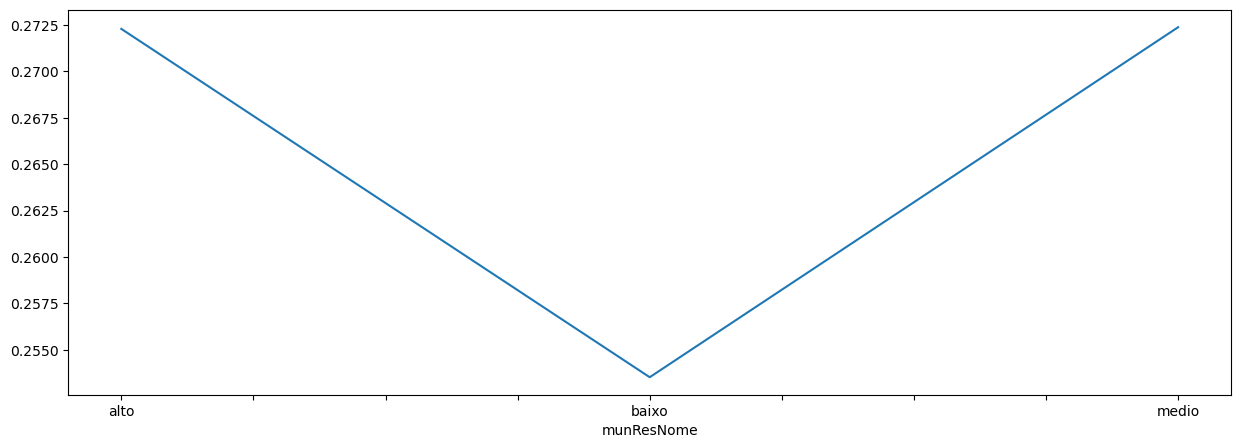

In [137]:
sinasc_idh.groupby(idh)['QTDFILMORT'].mean().plot(figsize=[15,5])


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [155]:
idfm ={
        'Ariquemes':'moderado',
        'Vilhena':'moderado',
        'Pimenta Bueno':'moderado',
        'Porto Velho':'moderado',
        'Ji-Paraná':'moderado',
        'Cacoal':'moderado',
        "Santa Luzia d'Oeste":'moderado',
        'Rolim de Moura':'moderado',
        'Chupinguaia':'moderado',
        'São Miguel do Guaporé':'moderado',
        'Pimenteiras do Oeste':'moderado',
        'Teixeirópolis':'moderado',
        'Colorado do Oeste':'moderado',
        'Jaru':'moderado',
        'Rio Crespo':'moderado',
        'Primavera de Rondônia':'moderado',
        "Alta Floresta d'Oeste":'moderado',
        'Ouro Preto do Oeste':'moderado',
        'São Francisco do Guaporé':'moderado',
        'Candeias do Jamari':'moderado',
        'Buritis':'moderado',
        "São Felipe d'Oeste":'moderado',
        'Presidente Médici':'moderado',
        'Cerejeiras':'moderado',
        'Monte Negro':'moderado',
        'Urupá':'moderado',
        "Espigão d'Oeste":'regular',
        'Seringueiras':'regular',
        "Alvorada d'Oeste":'regular',
        'Itapuã do Oeste':'regular',
        'Cabixi':'regular',
        'Novo Horizonte do Oeste':'regular',
        "Nova Brasilândia d'Oeste":'regular',
        'Vale do Paraíso':'regular',
        'Corumbiara':'regular',
        'Alto Paraíso':'regular',
        'Cacaulândia':'regular',
        'Vale do Anari':'regular',
        'Ministro Andreazza':'regular',
        'Costa Marques':'regular',
        'Nova União':'regular',
        'Guajará-Mirim':'regular',
        'Mirante da Serra':'regular',
        'Parecis':'regular',
        'Castanheiras':'regular',
        'Theobroma':'regular',
        "Machadinho d'Oeste":'regular',
        'Campo Novo de Rondônia':'regular',
        'Nova Mamoré':'regular',
        'Cujubim':'regular',
        'Alto Alegre dos Parecis':'regular',
        'Governador Jorge Teixeira':'regular'
        }

sinasc_idfm = sinasc_raw.set_index('munResNome')
sinasc_idfm.groupby(idfm)[['QTDPARTNOR', 'QTDPARTCES', 'QTDFILVIVO']].mean()

,QTDPARTNOR,QTDPARTCES,QTDFILVIVO
munResNome,,,
moderado,0.558033,0.517982,1.030350
regular,0.728571,0.494034,1.172404


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [158]:
pib={

        'Porto Velho':'Acima de 1 bilhao',
        'Ji-Paraná':'Acima de 1 bilhao',
        'Vilhena':'Acima de 1 bilhao',
        'Ariquemes':'Acima de 1 bilhao',
        'Cacoal':'Acima de 1 bilhao',
        'Jaru':'Acima de 1 bilhao',
        'Rolim de Moura':'Acima de 1 bilhao',
        'Pimenta Bueno':'Acima de 1 bilhao',
        
        'Guajará-Mirim':'Acima de 500 milhoes',
        'Ouro Preto do Oeste':'Acima de 500 milhoes',
        'Buritis':'Acima de 500 milhoes',
        'Machadinho do Oeste':'Acima de 500 milhoes',
        "Espigão d'Oeste":'Acima de 500 milhoes',
        'São Miguel do Guaporé':'Acima de 500 milhoes',
        'Candeias do Jamari':'Acima de 500 milhoes',
        'Nova Mamoré':'Acima de 500 milhoes',
        'Cerejeiras':'Acima de 500 milhoes',
        
        'Alta Floresta do Oeste':'Acima de 300 milhoes',
        'Presidente Médici':'Acima de 300 milhoes',
        'Cujubim':'Acima de 300 milhoes',
        'Nova Brasilândia do Oeste':'Acima de 300 milhoes',
        'Alto Paraíso':'Acima de 300 milhoes',
        'São Francisco do Guaporé':'Acima de 300 milhoes',
        'Colorado do Oeste':'Acima de 300 milhoes',
        
        'Monte Negro':'Acima de 200 milhoes',
        'Alto Alegre dos Parecis':'Acima de 200 milhoes',
        'Campo Novo de Rondônia':'Acima de 200 milhoes',
        'Alvorada do Oeste':'Acima de 200 milhoes',
        
        'Chupinguaia':'Acima de 100 milhoes',
        'Corumbiara':'Acima de 100 milhoes',
        'Ministro Andreazza':'Acima de 100 milhoes',
        'Urupá':'Acima de 100 milhoes',
        'Costa Marques':'Acima de 100 milhoes',
        'Seringueiras':'Acima de 100 milhoes',
        'Mirante da Serra':'Acima de 100 milhoes',
        'Governador Jorge Teixeira':'Acima de 100 milhoes',
        'Theobroma':'Acima de 100 milhoes',
        'Santa Luzia do Oeste':'Acima de 100 milhoes',
        'Novo Horizonte do Oeste':'Acima de 100 milhoes',
        'Itapuã do Oeste':'Acima de 100 milhoes',
        'Vale do Paraíso':'Acima de 100 milhoes',
        'Cacaulândia':'Acima de 100 milhoes',
        'Cabixi':'Acima de 100 milhoes',
        'Vale do Anari':'Acima de 100 milhoes',
        
        'Nova União':'Ate 100 milhoes',
        'Parecis':'Ate 100 milhoes',
        'Rio Cres':'Ate 100 milhoes',
        'Pimenteiras do Oeste':'Ate 100 milhoes',
        'Teixeirópolis':'Ate 100 milhoes',
        'São Felipe do Oeste':'Ate 100 milhoes',
        'Castanheiras':'Ate 100 milhoes',
        'Primavera de Rondônia':'Ate 100 milhoes'
}

sinasc_pib = sinasc_raw.set_index('munResNome')
sinasc_idfm.groupby(pib)[['PESO', 'SERIESCMAE']].mean()

,PESO,SERIESCMAE
munResNome,,
Acima de 1 bilhao,3247.215719,4.132694
Acima de 100 milhoes,3250.392337,4.296624
Acima de 200 milhoes,3233.701349,4.638191
Acima de 300 milhoes,3240.387380,4.264881
Acima de 500 milhoes,3243.336315,4.366847
Ate 100 milhoes,3196.902141,3.981735


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [ ]:
#Indices que teoricamente teriam relacao direta com a mensuracao de riqueza/pobreza de regioes nao refletem 
#diretamente a realizade que eu esperava encontrar ao analisar variaveis como quantidade de consultas pre-natal 
#('CONSULTAS'), havendo um registro maior em regioes onde o IDH e baixo/medio e a quantidade de filhos mortos 
#('QTDFILMORT') ser menor em regioes com IDH baixo.

#Analisando o IDFM tambem esperava encontrar uma discrepancia maior na quantidade de filhos vivos ('QTDFILVIVO'), 
#o que nao se concretizou, porem a comparacao de partos normais/cesarianas ('QTDPARTNOR', 'QTDPARTCES') seguiu a 
#tendencia nacional de cesarianas ocorrerem em maior comodidade em regioes de maior capital/desenvolvimento, 
#possivelmente devido a comodidade que a mesma proporciona para a mae em relacao a data e horario, apesar de ser 
#mais lesiva e necessitar de maior tempo de recuperacao que o parto normal.

#Por fim houve mais uma surpresa na analise por PIB, onde o maior PIB nao refletiu a maior escolaridade da mae 
#('SERIESCMAE'). A regiao com pib acima de 1 milhao ficou em 5 lugar na avaliacao de media de escolaridade das
#maes, perdendo apenas para a regiao com menor PIB analisado. Em relacao ao peso medio dos bebes por PIB, esperava
#que a regiao com menor PIB apresentasse menor media de peso no nascimento, o que tambem se confirmou, porem, 
#com uma variacao um pouco maior que 2%.